<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.663855,34.807662,43.860720,83.315787,-0.001009,211.647015,211.651293,-0.004278
1,0.0,1.0,44.330594,71.568625,52.253281,67.199526,0.000706,245.352733,245.353819,-0.001086
2,0.0,2.0,75.651038,29.911018,20.663473,26.281941,-0.009357,162.498114,162.505337,-0.007224
3,0.0,3.0,99.936325,87.781740,42.068684,28.631326,-0.002987,268.415088,268.416380,-0.001292
4,0.0,4.0,61.609259,59.860055,87.409927,91.486336,-0.000730,310.364847,310.369510,-0.004663
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.418186,32.538744,90.754960,72.889828,0.000538,239.602256,239.601743,0.000513
19996,999.0,16.0,37.677536,47.335350,74.488599,44.049815,0.004636,213.555935,213.550587,0.005348
19997,999.0,17.0,51.949932,32.080693,82.798397,35.501774,0.000105,212.330901,212.332234,-0.001332
19998,999.0,18.0,87.122794,73.699240,25.127324,39.745845,-0.000910,235.694292,235.699062,-0.004770


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.663855,34.807662,43.860720,83.315787,-0.001009,211.647015,211.651293,-0.004278
1,0.0,1.0,44.330594,71.568625,52.253281,67.199526,0.000706,245.352733,245.353819,-0.001086
2,0.0,2.0,75.651038,29.911018,20.663473,26.281941,-0.009357,162.498114,162.505337,-0.007224
3,0.0,3.0,99.936325,87.781740,42.068684,28.631326,-0.002987,268.415088,268.416380,-0.001292
4,0.0,4.0,61.609259,59.860055,87.409927,91.486336,-0.000730,310.364847,310.369510,-0.004663
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.418186,32.538744,90.754960,72.889828,0.000538,239.602256,239.601743,0.000513
19996,999.0,16.0,37.677536,47.335350,74.488599,44.049815,0.004636,213.555935,213.550587,0.005348
19997,999.0,17.0,51.949932,32.080693,82.798397,35.501774,0.000105,212.330901,212.332234,-0.001332
19998,999.0,18.0,87.122794,73.699240,25.127324,39.745845,-0.000910,235.694292,235.699062,-0.004770


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.663855  34.807662  43.860720  83.315787 -0.001009  211.647015   
      1.0    44.330594  71.568625  52.253281  67.199526  0.000706  245.352733   
      2.0    75.651038  29.911018  20.663473  26.281941 -0.009357  162.498114   
      3.0    99.936325  87.781740  42.068684  28.631326 -0.002987  268.415088   
      4.0    61.609259  59.860055  87.409927  91.486336 -0.000730  310.364847   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   33.418186  32.538744  90.754960  72.889828  0.000538  239.602256   
      16.0   37.677536  47.335350  74.488599  44.049815  0.004636  213.555935   
      17.0   51.949932  32.080693  82.798397  35.501774  0.000105  212.330901   
      18.0   87.122794  73.699240  25.127324  39.745845 -0.000910  235.694292   
      19.0   60.894715  44.094222  76.580939  33.129709 -0.001524  224.698061   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    211.651293 -0.004278  
      1.0    245.353819 -0.001086  
      2.0    162.505337 -0.007224  
      3.0    268.416380 -0.001292  
      4.0    310.369510 -0.004663  
...                 ...       ...  
999.0 15.0   239.601743  0.000513  
      16.0   213.550587  0.005348  
      17.0   212.332234 -0.001332  
      18.0   235.699062 -0.004770  
      19.0   224.700612 -0.002551  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.663855  34.807662  43.860720  83.315787 -0.001009  211.647015   
      1.0    44.330594  71.568625  52.253281  67.199526  0.000706  245.352733   
      2.0    75.651038  29.911018  20.663473  26.281941 -0.009357  162.498114   
      3.0    99.936325  87.781740  42.068684  28.631326 -0.002987  268.415088   
      4.0    61.609259  59.860055  87.409927  91.486336 -0.000730  310.364847   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   33.418186  32.538744  90.754960  72.889828  0.000538  239.602256   
      16.0   37.677536  47.335350  74.488599  44.049815  0.004636  213.555935   
      17.0   51.949932  32.080693  82.798397  35.501774  0.000105  212.330901   
      18.0   87.122794  73.699240  25.127324  39.745845 -0.000910  235.694292   
      19.0   60.894715  44.094222  76.580939  33.129709 -0.001524  224.698061   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    211.651293 -0.004278  
      1.0    245.353819 -0.001086  
      2.0    162.505337 -0.007224  
      3.0    268.416380 -0.001292  
      4.0    310.369510 -0.004663  
...                 ...       ...  
999.0 15.0   239.601743  0.000513  
      16.0   213.550587  0.005348  
      17.0   212.332234 -0.001332  
      18.0   235.699062 -0.004770  
      19.0   224.700612 -0.002551  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.663855,34.807662,43.860720,83.315787,-0.001009,211.647015,211.651293,-0.004278
1,0.0,1.0,44.330594,71.568625,52.253281,67.199526,0.000706,245.352733,245.353819,-0.001086
2,0.0,2.0,75.651038,29.911018,20.663473,26.281941,-0.009357,162.498114,162.505337,-0.007224
3,0.0,3.0,99.936325,87.781740,42.068684,28.631326,-0.002987,268.415088,268.416380,-0.001292
4,0.0,4.0,61.609259,59.860055,87.409927,91.486336,-0.000730,310.364847,310.369510,-0.004663
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.418186,32.538744,90.754960,72.889828,0.000538,239.602256,239.601743,0.000513
19996,999.0,16.0,37.677536,47.335350,74.488599,44.049815,0.004636,213.555935,213.550587,0.005348
19997,999.0,17.0,51.949932,32.080693,82.798397,35.501774,0.000105,212.330901,212.332234,-0.001332
19998,999.0,18.0,87.122794,73.699240,25.127324,39.745845,-0.000910,235.694292,235.699062,-0.004770


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.663855  34.807662  43.860720  83.315787 -0.001009  211.647015   
      1.0    44.330594  71.568625  52.253281  67.199526  0.000706  245.352733   
      2.0    75.651038  29.911018  20.663473  26.281941 -0.009357  162.498114   
      3.0    99.936325  87.781740  42.068684  28.631326 -0.002987  268.415088   
      4.0    61.609259  59.860055  87.409927  91.486336 -0.000730  310.364847   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   33.418186  32.538744  90.754960  72.889828  0.000538  239.602256   
      16.0   37.677536  47.335350  74.488599  44.049815  0.004636  213.555935   
      17.0   51.949932  32.080693  82.798397  35.501774  0.000105  212.330901   
      18.0   87.122794  73.699240  25.127324  39.745845 -0.000910  235.694292   
      19.0   60.894715  44.094222  76.580939  33.129709 -0.001524  224.698061   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    211.651293 -0.004278  
      1.0    245.353819 -0.001086  
      2.0    162.505337 -0.007224  
      3.0    268.416380 -0.001292  
      4.0    310.369510 -0.004663  
...                 ...       ...  
999.0 15.0   239.601743  0.000513  
      16.0   213.550587  0.005348  
      17.0   212.332234 -0.001332  
      18.0   235.699062 -0.004770  
      19.0   224.700612 -0.002551  

[20000 rows x 8 columns]

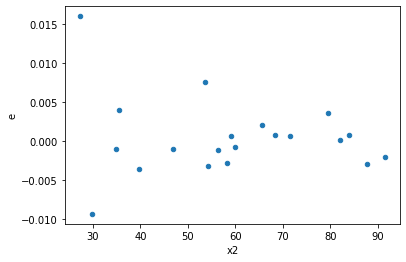

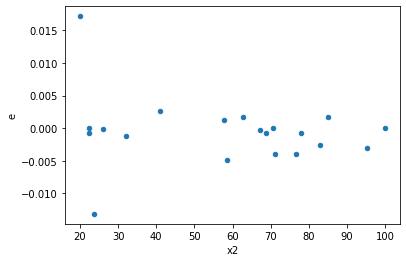

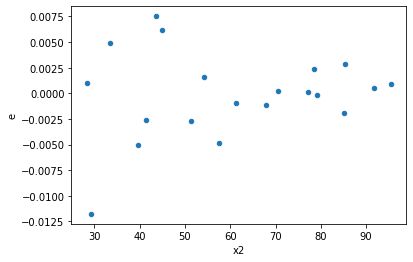

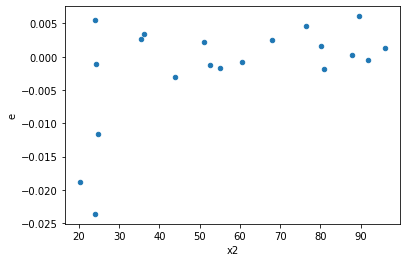

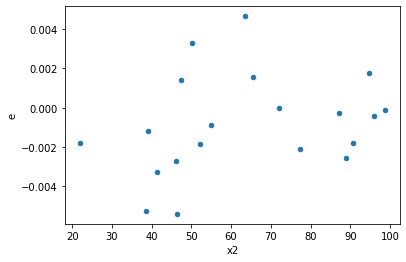

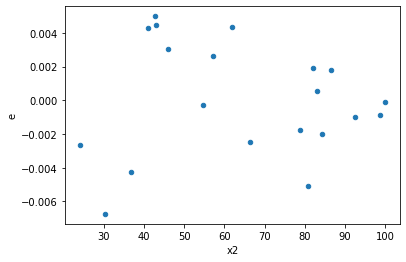

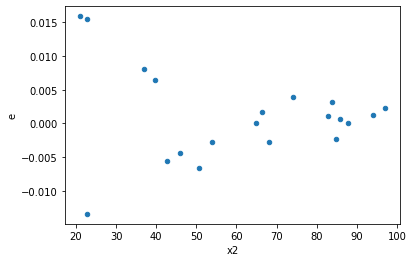

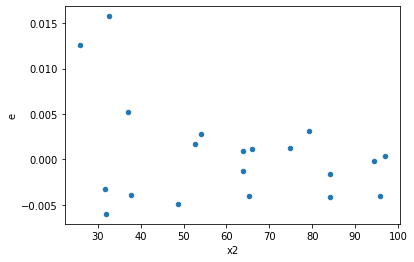

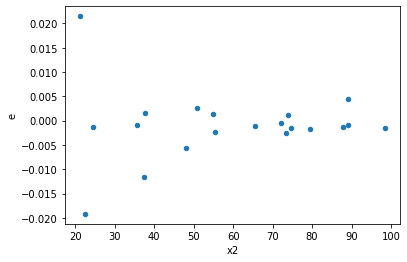

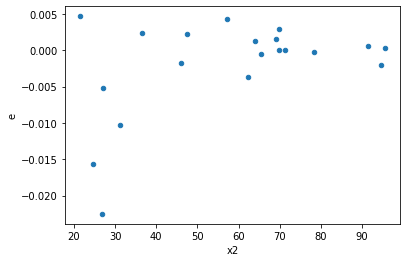

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,4.0,4.0,5.044229064586802e-06,4.157580110007069e-05,1.2610572661467005e-06,1.0393950275017672e-05,8.242250811319245,0.06517510102680313,0.9674124494865984,0.032587550513401564,Reject001=1 : Homoscedasticity
18.0,4.0,4.0,5.5206534327605036e-05,6.806129780747802e-05,1.3801633581901259e-05,1.7015324451869504e-05,1.2328485864298349,0.8441422453251315,0.5779288773374343,0.42207112266256575,Reject001=1 : Homoscedasticity
19.0,4.0,4.0,1.0367208906961395e-05,3.398707274453673e-05,2.591802226740349e-06,8.496768186134183e-06,3.2783242866568476,0.27671756257535174,0.8616412187123241,0.13835878128767587,Reject001=1 : Homoscedasticity
22.0,4.0,4.0,4.37092844688099e-05,0.00016890262916795956,1.0927321117202475e-05,4.222565729198989e-05,3.864227731489981,0.21882985627640594,0.890585071861797,0.10941492813820297,Reject001=1 : Homoscedasticity
29.0,4.0,4.0,0.00018034963562440072,0.00018369257818234684,4.508740890610018e-05,4.592314454558671e-05,1.0185358985970352,0.9862261224094762,0.5068869387952619,0.4931130612047381,Reject001=1 : Homoscedasticity
35.0,4.0,4.0,3.890534389343768e-06,9.758906706249633e-06,9.72633597335942e-07,2.439726676562408e-06,2.5083717889705395,0.3948329875636678,0.8025835062181661,0.1974164937818339,Reject001=1 : Homoscedasticity
46.0,4.0,4.0,1.0272102285938038e-05,3.159202441528658e-05,2.5680255714845095e-06,7.898006103821644e-06,3.075516923009458,0.3021419806997896,0.8489290096501052,0.1510709903498948,Reject001=1 : Homoscedasticity
47.0,4.0,4.0,5.959145597002686e-06,2.6128465013283428e-05,1.4897863992506716e-06,6.532116253320857e-06,4.38459919932573,0.18131879727251077,0.9093406013637446,0.09065939863625538,Reject001=1 : Homoscedasticity
48.0,4.0,4.0,3.6763548426495515e-05,3.819670412902904e-05,9.190887106623879e-06,9.54917603225726e-06,1.0389830624048426,0.9713251816952602,0.5143374091523699,0.4856625908476301,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,6.269954764053515e-05,2.1831952576524877e-05,1.5674886910133788e-05,5.457988144131219e-06,0.34819952293261136,0.3313104710726032,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,0.00019827931085508724,3.889270790262069e-07,4.956982771377181e-05,9.723176975655173e-08,0.001961511149846869,2.296484721763246e-05,Reject001=0 : Heteroscedasticity
2.0,4.0,4.0,0.00016389788545384792,9.209356261021126e-06,4.097447136346198e-05,2.3023390652552814e-06,0.056189597782299594,0.016379343010992826,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,8.642348475253474e-05,2.0534555484578003e-05,2.1605871188133685e-05,5.133638871144501e-06,0.23760388213200045,0.19284828593449127,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,4.751200902510045e-05,8.941784412565467e-06,1.1878002256275113e-05,2.2354461031413667e-06,0.18820051174517896,0.13463191324552928,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,4.120859951749054e-05,9.051041485875462e-06,1.0302149879372635e-05,2.2627603714688654e-06,0.21963962842352472,0.17122377964038948,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,0.00036287549145201556,1.0438517795674072e-05,9.071887286300389e-05,2.609629448918518e-06,0.028766114112323285,0.004603712334593273,Reject001=0 : Heteroscedasticity
7.0,4.0,4.0,5.044229064586802e-06,4.157580110007069e-05,1.2610572661467005e-06,1.0393950275017672e-05,8.242250811319245,0.06517510102680313,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,0.00026167215879802726,1.3677474175768935e-05,6.541803969950681e-05,3.4193685439422337e-06,0.052269504859039854,0.014314253094947908,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      866
Reject001=0 : Heteroscedasticity    134
Name: Result_test, dtype: int64